In [1]:
import numpy as np 
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
import seaborn as sns

In [3]:
diabetes = pd.read_csv('./pima-indians-diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(diabetes.describe(include='all'))
diabetes.isna().sum()

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetespedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetespedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outcome
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

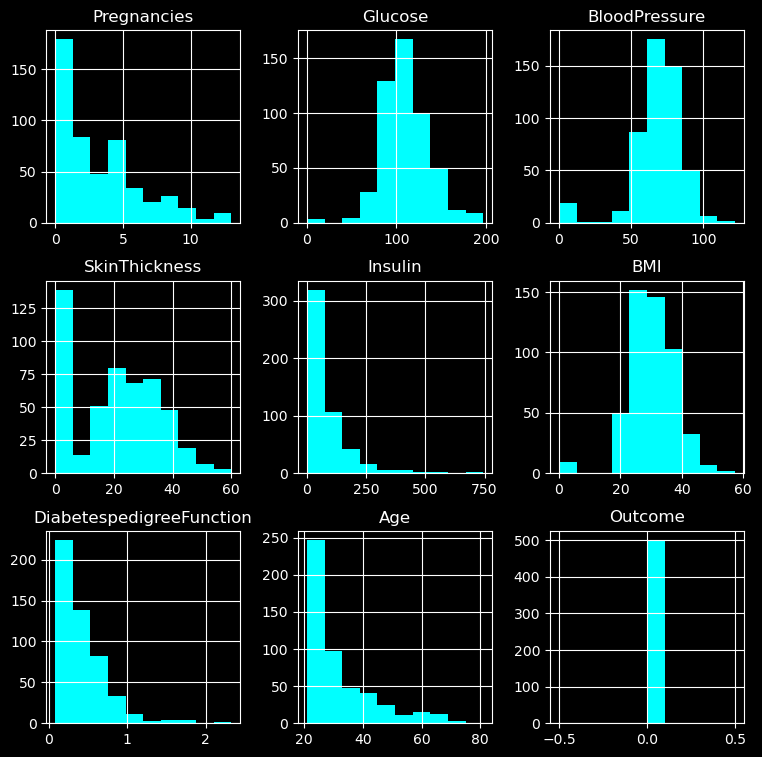

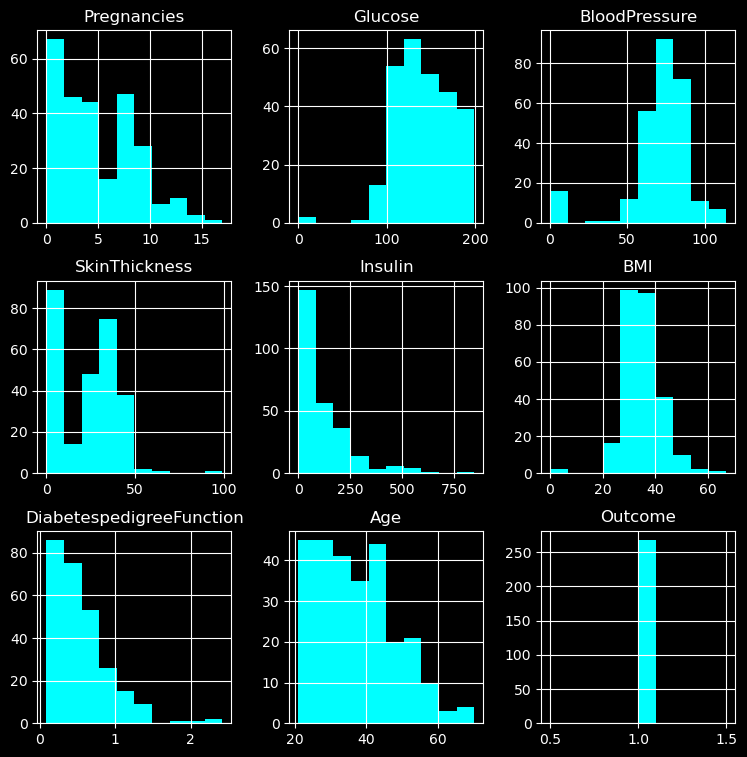

In [5]:
diabetes.groupby('Outcome').hist(figsize=(9, 9),color='cyan')

<Axes: title={'center': 'Corelation'}>

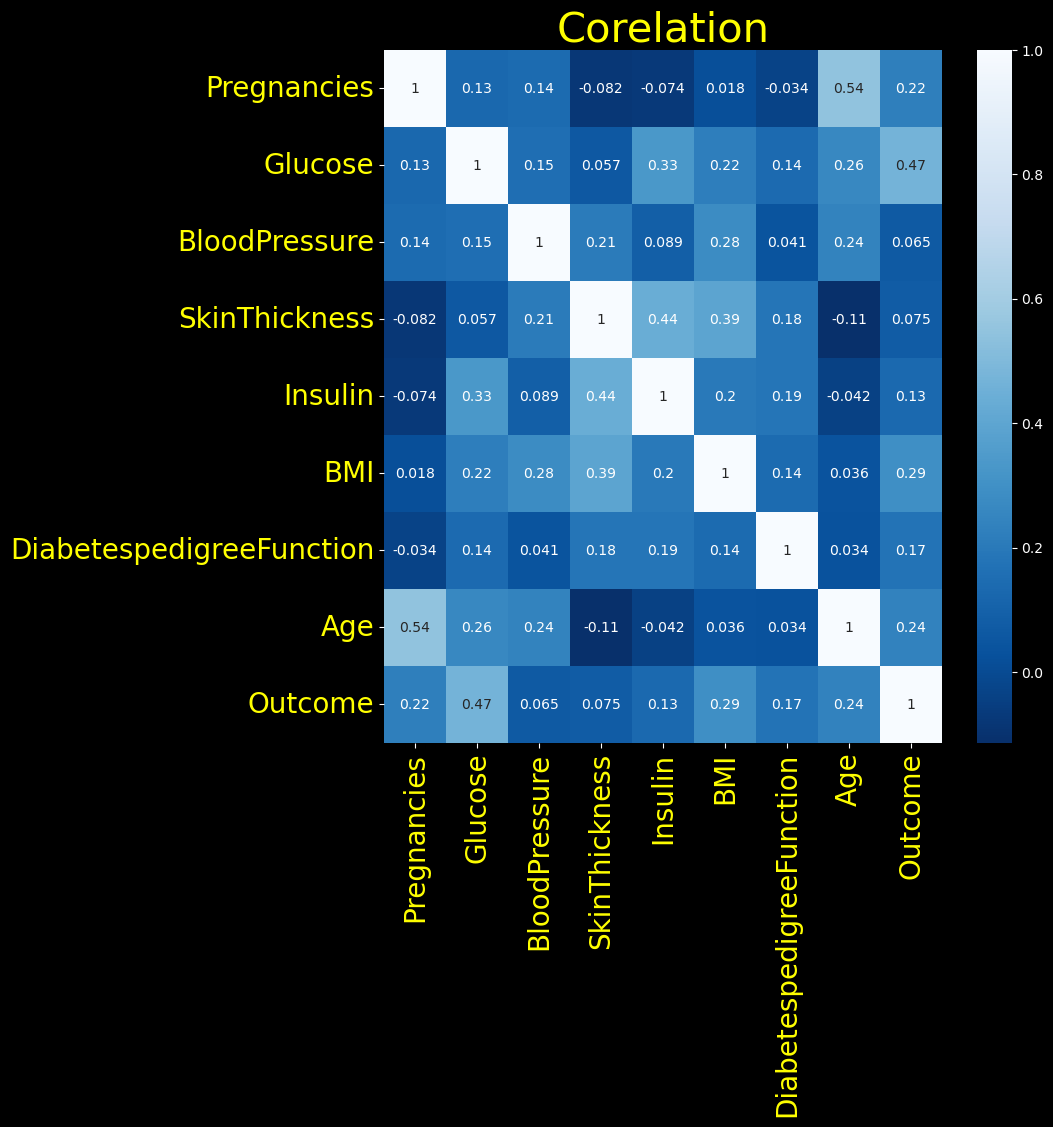

In [6]:
corr = diabetes.corr()
plt.figure(figsize=(9,9))
plt.title('Corelation',color='yellow',size=30)
plt.xticks(size=20,color='yellow')
plt.yticks(size=20,color='yellow')
sns.heatmap(corr,annot=True,cmap='Blues_r')

In [14]:
from pycaret.classification import *

In [15]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
clf = setup(data = diabetes, target = 'Outcome',train_size=0.8,numeric_imputation='mean',categorical_imputation='mode',feature_selection=True)

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Description,Value
0,Session id,7098
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 2)"
5,Transformed train set shape,"(614, 2)"
6,Transformed test set shape,"(154, 2)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [12]:
#pip install pycaret


  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/c7/d8/4e703f17f17d7d7764fe6d586872e787ce3a248640221f5f2d586f671eee/pycaret-3.3.0-py3-none-any.whl.metadata
  Using cached pycaret-3.3.0-py3-none-any.whl.metadata (17 kB)
  Using cached pyod-1.1.3-py3-none-any.whl
  Obtaining dependency information for imbalanced-learn>=0.12.0 from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
  Obtaining dependency information for category-encoders>=2.4.0 from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
  Obtaining dependency information for lightgbm>=3.0.0 from https://files.pythonhosted

In [16]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7035,0.0000,0.2792,0.7034,0.3668,0.2341,0.2786,0.0580
lr,Logistic Regression,0.7019,0.0000,0.2933,0.6912,0.3783,0.2371,0.2773,0.8710
nb,Naive Bayes,0.6987,0.0000,0.3028,0.6036,0.3900,0.2354,0.2575,0.0570
qda,Quadratic Discriminant Analysis,0.6987,0.0000,0.3028,0.6036,0.3900,0.2354,0.2575,0.0540
lda,Linear Discriminant Analysis,0.6987,0.0000,0.2885,0.6343,0.3719,0.2284,0.2593,0.0490
gbc,Gradient Boosting Classifier,0.6807,0.0000,0.3214,0.5611,0.3995,0.2118,0.2273,0.0730
ada,Ada Boost Classifier,0.6644,0.0000,0.2468,0.5814,0.3102,0.1485,0.1776,0.0780
lightgbm,Light Gradient Boosting Machine,0.6530,0.0000,0.3498,0.5062,0.4088,0.1765,0.1845,0.0870
dummy,Dummy Classifier,0.6515,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0490
et,Extra Trees Classifier,0.6319,0.0000,0.3180,0.4659,0.3731,0.1276,0.1340,0.0870


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=7098, solver='auto',
                tol=0.0001)

In [17]:
rc = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7742,0.0000,0.5455,0.7500,0.6316,0.4746,0.4871
1,0.6774,0.0000,0.2273,0.6250,0.3333,0.1777,0.2173
2,0.6613,0.0000,0.0455,1.0000,0.0870,0.0579,0.1726
3,0.7258,0.0000,0.5455,0.6316,0.5854,0.3822,0.3845
4,0.6885,0.0000,0.1429,0.7500,0.2400,0.1459,0.2262
5,0.6230,0.0000,0.1429,0.3750,0.2069,0.0209,0.0251
6,0.6885,0.0000,0.2381,0.6250,0.3448,0.1912,0.2296
7,0.7869,0.0000,0.4762,0.8333,0.6061,0.4745,0.5094
8,0.7377,0.0000,0.3333,0.7778,0.4667,0.3278,0.3796


In [18]:
tuned_model=tune_model(rc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7742,0.0000,0.5455,0.7500,0.6316,0.4746,0.4871
1,0.6774,0.0000,0.2273,0.6250,0.3333,0.1777,0.2173
2,0.6613,0.0000,0.0455,1.0000,0.0870,0.0579,0.1726
3,0.7258,0.0000,0.5455,0.6316,0.5854,0.3822,0.3845
4,0.6885,0.0000,0.1429,0.7500,0.2400,0.1459,0.2262
5,0.6230,0.0000,0.1429,0.3750,0.2069,0.0209,0.0251
6,0.6885,0.0000,0.2381,0.6250,0.3448,0.1912,0.2296
7,0.7869,0.0000,0.4762,0.8333,0.6061,0.4745,0.5094
8,0.7377,0.0000,0.3333,0.7778,0.4667,0.3278,0.3796


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [21]:
ensembled_lr = ensemble_model(rc,method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7742,0.0000,0.5455,0.7500,0.6316,0.4746,0.4871
1,0.6774,0.0000,0.2273,0.6250,0.3333,0.1777,0.2173
2,0.6613,0.0000,0.0455,1.0000,0.0870,0.0579,0.1726
3,0.7258,0.0000,0.5455,0.6316,0.5854,0.3822,0.3845
4,0.6885,0.0000,0.1429,0.7500,0.2400,0.1459,0.2262
5,0.6230,0.0000,0.1429,0.3750,0.2069,0.0209,0.0251
6,0.6885,0.0000,0.2381,0.6250,0.3448,0.1912,0.2296
7,0.7869,0.0000,0.4762,0.8333,0.6061,0.4745,0.5094
8,0.7377,0.0000,0.3333,0.7778,0.4667,0.3278,0.3796
